In [1]:
import my_utilities_module as util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Dataframes implement the Pandas API
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import sys
from scipy import stats

In [2]:
new_big_df=pd.read_csv('big_df.csv',   error_bad_lines=False,low_memory=False)

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
new_big_df.shape

(1907317, 40)

In [4]:
new_big_df.head(5)

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,00000000000000225,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,endives,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN
2,0000000000031,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,NaN,...,685.8,1.9,1.00,NaN,NaN,NaN,15.3,1.1,0.44,NaN
4,000000000004622327,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,...,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.1,0.84,NaN


##### 2- Conception de l'application "GreenFood"
- Dans l'objectif d'encourager le consommateur d'acheter des produits qui ont moins d'impact négatif sur l'environnement et au même temps qui sont bien pour notre corps, je propose une application qui permet de proposer d'autres produits au consommateur, ayant le même nutriscore, mais protégeant mieux notre environnement ainsi que notre santé.  
- Consommer d'une manière bio, ou plutôt éthique, est l'objectif de mon application que je nommerai "GreenFood". 


- Le principe de l'application est le suivant: 

**1-** Le consommateur choisi un produit et scane son code-à-barre  
**2-** GreenFood détecte le scoreGrade du produit  
**3-** GreenFood récupère tous les produits sous la même catégorie et ayant le même nutriscoreGrade  
**4-** Une comparaison est établie entre l'ecoScore-Grade et NOVA Group du produit sélectionné et ceux des autres produits récupérés. Ainsi, GreenFood propose au consommateurs des produits de même catégorie et de même nutriscore , mais ayant un ecoScore et appartenant à un NOVA Group meilleur.

Dans ce but, les variable utiles pour notre application sont: {code,product_name, packaging, categories, nutriscore_score, nutriscore_grade, nova_group, ecoscore_score_fr, ecoscore_grade_fr}
il faut tout d'abord vérifier la qualité des variables utiles pour notre application. Pour celà, il faut vérifier:  
**1-** si le nutriscore-Grade correspond au nutriscrore-score
**2-** si l'ecoscore_score correspond au ecoscore_grade
**3** si la qualité de "packaging" correspond vraiment à la catégorie d'ecoscore_grade affecté.
**4** s'il y a des outliers/ valeurs aberrates

In [5]:
new_big_df.columns

Index(['code', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'quantity', 'packaging',
       'brands', 'categories', 'labels', 'countries', 'ingredients_text',
       'serving_size', 'serving_quantity', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'brand_owner', 'ecoscore_score_fr', 'ecoscore_grade_fr',
       'main_category', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [6]:
app_columns=['code','product_name', 'countries','categories','main_category', 'nutriscore_score', 'nutriscore_grade', 'nova_group','additives_n', 'ingredients_from_palm_oil_n','ecoscore_score_fr', 'ecoscore_grade_fr','energy_100g','fiber_100g', 'fat_100g','sugars_100g','salt_100g','proteins_100g', 'pnns_groups_1', 'pnns_groups_2']
new_big_df=new_big_df[app_columns]
new_big_df.head(30)

,code,product_name,countries,categories,main_category,nutriscore_score,nutriscore_grade,nova_group,additives_n,ingredients_from_palm_oil_n,ecoscore_score_fr,ecoscore_grade_fr,energy_100g,fiber_100g,fat_100g,sugars_100g,salt_100g,proteins_100g,pnns_groups_1,pnns_groups_2
0,00000000000000225,jeunes pousses,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
1,0000000000017,Vitória crackers,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1569.0,NaN,7.0,15.0,1.400,7.8,unknown,unknown
2,0000000000031,Cacao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
3,000000000003327986,Filetes de pollo empanado,Espagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.8,NaN,1.9,NaN,1.100,15.3,unknown,unknown
4,000000000004622327,Hamburguesas de ternera 100%,en:es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3661.0,NaN,15.1,1.0,2.100,15.7,unknown,unknown
5,0000000000100,moutarde au moût de raisin,France,"Epicerie, Condiments, Sauces, Moutardes",en:mustards,18.0,d,NaN,0.0,0.0,55.0,c,936.0,0.0,8.2,22.0,4.600,5.1,Fat and sauces,Dressings and sauces
6,00000000001111111111,Sfiudwx,en:France,Xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
7,0000000000123,Sauce Sweety chili 0%,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,0.0,0.4,2.040,0.2,unknown,unknown
8,0000000000178,Mini coco,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,NaN,3.0,3.0,1.150,2.0,unknown,unknown
9,0000000000208,Pistou d'ail des ours,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown


<AxesSubplot:>

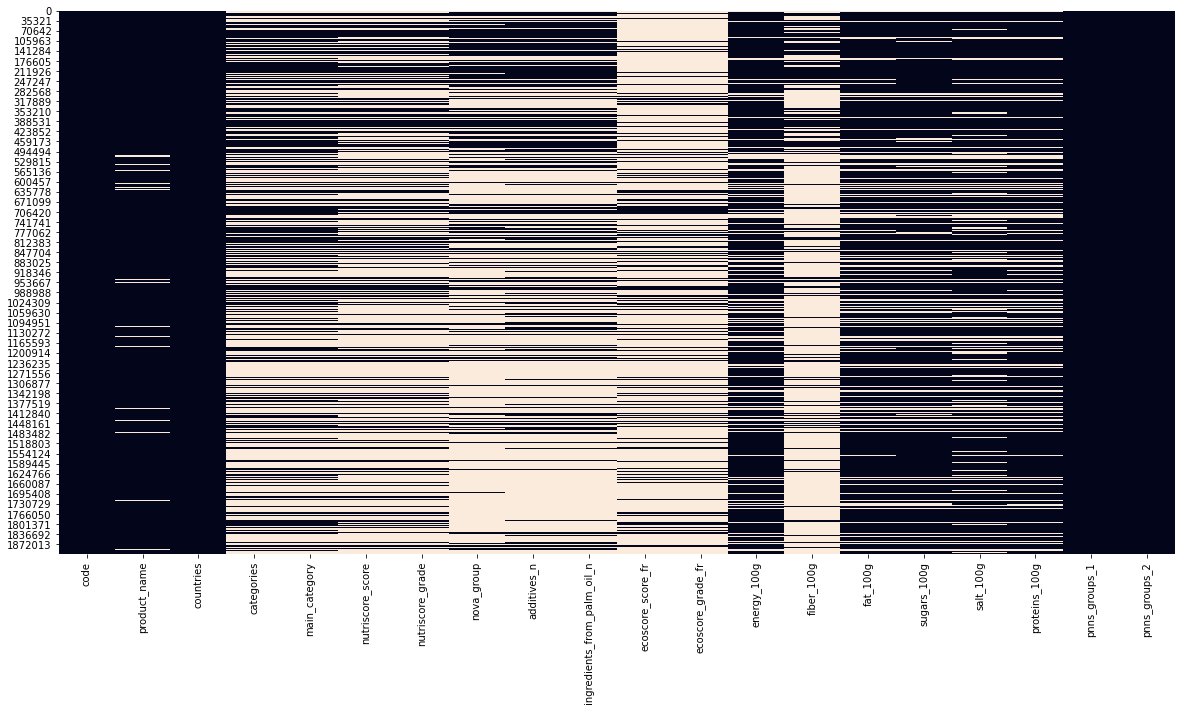

In [7]:
#vérifier les valeurs manquantes dans notre nouveau dataset
plt.figure(figsize=(20,10))
sns.heatmap(new_big_df.isna(), cbar=False)

### Choix de la colonne des catégories  
 Dans cette section, nous allors étudier les quatres colonnes qui contiennent les catégories des produits alimentaires à choisir pour notre application.  
 Pour celà, nous allons étudier les quatre colonnes 'categories', 'main_category', 'pnns_groups_1', 'pnns_groups_2'.  
 Notre objectif est de trouver la colonne qui contienne des catégories plus cleané, et qui assure le maximum le compromis entre valeurs manquantes et valeurs uniques. C'est à dire, avoir une colonne avec , par exemple, uniquement 10% des valeurs manquantes, nous sera inutile si le pourcentage des valeurs uniques par rapport au total est de l'ordre de 80%. Parce que ceci signifie qu'on a beaucoup de catégories ce qui serai un peu compliqué à gérer après dans le modèle de ML. Dans un autre exemple, une colonne avec 80% de valeurs manquantes, et 10% de valeurs unique, est aussi inutile vue qu'on a rien à faire avec une colonne quasi-vide.

In [8]:
pd.set_option("max_colwidth",9000)

categories_list=['categories', 'main_category', 'pnns_groups_1', 'pnns_groups_2']

stats_categories=pd.DataFrame(columns=['nom du colonne','nbre valeurs uniques','% de NaN','% de chaque valeur'])
for categ in categories_list:
    new_row={'nom du colonne':categ,
             'nbre valeurs uniques': new_big_df[categ].unique().size,
             '% de NaN': (new_big_df[categ].isnull().sum()/new_big_df[categ].shape[0])*100,
             '% de chaque valeur':(new_big_df[categ].value_counts(normalize=True)*100)}
    stats_categories=stats_categories.append(new_row, ignore_index=True)
stats_categories

,nom du colonne,nbre valeurs uniques,% de NaN,% de chaque valeur
0,categories,103647,52.753213,"Snacks 3.629379 Snacks, Sweet snacks, Confectioneries 1.585204 Groceries, Sauces 1.541704 Dairies, Fermented foods, Fermented milk products, Cheeses 1.268829 Snacks, Sweet snacks, Biscuits and cakes, Biscuits 1.123791 ... Produits laitiers, Matières grasses, Produits à tartiner, Matières grasses à tartiner, Matières grasses animales, Matière grasse laitière, Produits laitiers à tartiner, Beurres, Beurres doux, en:butter-82-fat-unsalted 0.000111 Produits laitiers, Produits fermentés, Produits laitiers fermentés, Yaourts, Yaourts aux fruits, Yaourts aux fruits avec morceaux, Yaourts à la poire 0.000111 Produits laitiers, Produits fermentés, Produits laitiers fermentés, Yaourts, Yaourts aux fruits, Yaourts au lait de vache, Yaourts au fruit de la passion 0.000111 Produits laitiers, Produits fermentés, Produits laitiers fermentés, Yaourts, Yaourts aux fruits, Yaourts à la mirabelle 0.000111 Kekse und Kuchen, Kuchen, Tiefkühl-Kuchen 0.000111 Name: categories, Length: 103646, dtype: float64"
1,main_category,30983,52.753423,"en:snacks 3.655362 en:sauces 1.791505 en:confectioneries 1.703616 en:biscuits 1.676761 en:cheeses 1.652903 ... fr:pacherenc 0.000111 fr:cerise-amande 0.000111 fr:saucisse-seche-au-fromage 0.000111 en:fenugreek-leaves 0.000111 hu:extrudált-kukorica 0.000111 Name: main_category, Length: 30982, dtype: float64"
2,pnns_groups_1,13,0.015781,"unknown 61.571586 Sugary snacks 8.008271 Fish Meat Eggs 5.377616 Milk and dairy products 4.813122 Cereals and potatoes 4.372695 Fat and sauces 3.745747 Beverages 3.580725 Fruits and vegetables 2.977374 Composite foods 2.898822 Salty snacks 1.774028 Alcoholic beverages 0.879909 sugary-snacks 0.000105 Name: pnns_groups_1, dtype: float64"
3,pnns_groups_2,43,0.015676,"unknown 61.571522 Sweets 3.618214 Biscuits and cakes 3.306628 Dressings and sauces 2.596934 Cheese 2.381257 One-dish meals 2.236057 Cereals 2.094946 Processed meat 2.076069 Milk and yogurt 1.704913 Vegetables 1.617604 Meat 1.605386 Fish and seafood 1.438581 Sweetened beverages 1.210162 Bread 1.154840 Fats 1.148809 Fruits 0.893437 Alcoholic beverages 0.880013 Chocolate products 0.757413 Salty and fatty products 0.748970 Appetizers 0.607126 Unsweetened beverages 0.549811 Fruit juices 0.508333 Breakfast cereals 0.498527 Artificially sweetened beverages 0.490871 Legumes 0.469267 Pizza pies and quiches 0.450337 Nuts 0.417930 Ice cream 0.368743 Waters and flavored waters 0.359252 Dairy desserts 0.358203 Pastries 0.326006 Dried fruits 0.318508 Plant-based milk substitutes 0.304979 Sandwiches 0.212373 Eggs 0.192132 Potatoes 0.155111 Soups 0.147822 Teas and herbal teas and coffees 0.085526 Fruit nectars 0.071787 Offals 0.065442 pastries 0.000105 Pizza pies and quiche 0.000052 Name: pnns_groups_2, dtype: float64"


### Remarques  
**1-** La première remarque qu'on peut voir, c'est concernant le pourcentage de nans. Pour 'pnns_groups_1', et 'pnns_groups_2', les pourcentages ne sont pas représentatives parce que , c'est noté "unknown" au lieu de NaN. et donc, les pourcentages de valeurs manquantes pour ces deux colonnes sont respectivement: 61,57%  et 61,57% (les pourcentage de 'unknown')  
**2-** La colonne 'categories' et 'main_categories' contiennent respectivement 103647 et 29843	de catégories, ce qui est énorme et difficile à traiter après.   
**3-** Pour les colonnes 'pnns_groups_1', 'pnns_groups_2', ils ont les deux le même pourcentage de valeurs manquantes. Le choix va donc reposer sur la qualité des données.  
**4** Je pense que  'pnns_groups_1', contient un nombre de catégories moins représentatifs par rapport aux produits existants. Par exemple, fish, Meat Eggs, sont trois catégories totalement différentes mais ils sont classés sous la même catégorie. Pareil pour 'Fat ans sauces' ou 'Fruits ans vegetables'. Je pense que cette catégorie regroupe le type de produit selon leur apports nutriftif. Ca pourra être utile pour prédire la nutriscore_grade (hypothès à vérifier!)  
**5-** Pour la colonne 'pnns_groups_2', je pense qu'elle assure le compromis entre pourcentage de valeurs manquantes (61%, c'est le meilleur pourcentage selon nos données) et nombre de valeurs uniques. Par contre, il y a quelques opérations de nettoyage à faire pour ces données:  
- Même catégorie en pluriel et aussi en singulier ( Pizza pies and quiche/Pizza pies and quiches),  

- Des catégories qui peuvent être regroupées  
  (sweets/Biscuits and cakes/ Ice cream/Chocolate products/ pastries/Pastries/Dairy desserts),   
  ( Processed meat/Meat/Offals),   
  (Fruit nectars/Fruit juices),   
  (Sweetened beverages/Artificially sweetened beverages/Unsweetened beverages/Alcoholic beverages),   
  (Plant-based milk substitutes/Milk and yogurt),   
  (Breakfast cereals/Cereals),   
  (Vegetables/Legumes),  
  (Dried fruits/Nuts).

In [9]:
new_big_df['pnns_groups_2'].value_counts(normalize=True)

unknown                             6.157152e-01
Sweets                              3.618214e-02
Biscuits and cakes                  3.306628e-02
Dressings and sauces                2.596934e-02
Cheese                              2.381257e-02
One-dish meals                      2.236057e-02
Cereals                             2.094946e-02
Processed meat                      2.076069e-02
Milk and yogurt                     1.704913e-02
Vegetables                          1.617604e-02
Meat                                1.605386e-02
Fish and seafood                    1.438581e-02
Sweetened beverages                 1.210162e-02
Bread                               1.154840e-02
Fats                                1.148809e-02
Fruits                              8.934368e-03
Alcoholic beverages                 8.800127e-03
Chocolate products                  7.574129e-03
Salty and fatty products            7.489704e-03
Appetizers                          6.071259e-03
Unsweetened beverage

In [10]:
# creer une nouvelle colonne en copiant 'pnns_groups_2'
new_big_df['final_categories'] = new_big_df['pnns_groups_2']

In [11]:
replacements = {
    'final_categories': {
       r'(sweets|Biscuits and cakes|Pastries|pastries|Ice cream)': 'Sweets',
       r'(Breakfast cereals)': 'Cereals',
       r'(Processed meat|Offals)': 'Meat',
       r'(Fruit nectars)': 'Fruit juices',
       r'(Sweetened beverages|Artificially sweetened beverages|Unsweetened beverages|Alcoholic beverages)': 'Beverages',
       r'(Plant-based milk substitutes)': 'Milk and yogurt',
       r'(Legumes)': 'Vegetables',
       r'(Pizza pies and quiches)': 'Pizza pies and quiche',
       r'(Dried fruits|Nuts)': 'Dried fruits and Nuts',
       r'(unknown)': 'Other categories'}
}
new_big_df.replace(replacements, regex=True, inplace=True)
# creer un dictionnaire de remplacement des categories. le terme "unknown" sera remplacé par "autre catégorie"
#new_big_df['final_categories'] = new_big_df['final_categories'].replace(['Sweets','Biscuits and cakes','Ice cream','Chocolate products','pastries','Pastries','Dairy desserts'],'sweets')



In [12]:
print('le nombre de valeurs uniques pour final_categories est : ', new_big_df['final_categories'].unique().size)
print()
print('la liste des valeurs uniques est:\n', new_big_df['final_categories'].value_counts(normalize=True))

le nombre de valeurs uniques pour final_categories est :  28

la liste des valeurs uniques est:
 Other categories                    0.615715
Sweets                              0.076197
Meat                                0.037469
Beverages                           0.031309
Dressings and sauces                0.025969
Cereals                             0.025935
Cheese                              0.023813
One-dish meals                      0.022361
Vegetables                          0.020869
Milk and yogurt                     0.020099
Fish and seafood                    0.014386
Bread                               0.011548
Fats                                0.011488
Fruits                              0.008934
Chocolate products                  0.007574
Salty and fatty products            0.007490
Dried fruits and Nuts               0.007364
Appetizers                          0.006071
Fruit juices                        0.005801
Pizza pies and quiche               0.004504
Wat

### Conclusion  
- Après avoir regrouper les catégories similaires, le nombre final de catégories passe de 43 --> 28. Nous considérons donc la nouvelle colonne 'final_categories' pour notre application.

## 3- Analyse univariée

In [13]:
#garder uniquement les colonnes utiles pour notre analyse statistiques:
stats_columns=['product_name','countries','final_categories','nutriscore_score', 'nutriscore_grade', 'nova_group','additives_n', 'ingredients_from_palm_oil_n','ecoscore_score_fr', 'ecoscore_grade_fr','energy_100g','fiber_100g', 'fat_100g','sugars_100g','salt_100g','proteins_100g']
new_big_df=new_big_df[stats_columns]
util.variable_survey(new_big_df)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,product_name,object,1192378,4.17 %
1,countries,object,10580,0.3 %
2,final_categories,object,27,0.02 %
3,nutriscore_score,float64,56,63.36 %
4,nutriscore_grade,object,5,63.36 %
5,nova_group,float64,4,67.57 %
6,additives_n,float64,40,62.88 %
7,ingredients_from_palm_oil_n,float64,4,62.88 %
8,ecoscore_score_fr,float64,149,75.84 %
9,ecoscore_grade_fr,object,5,75.84 %


In [14]:
#vérifier les types de variables dans notre nouveau dataset
new_big_df.dtypes.value_counts()

float64    11
object      5
dtype: int64

<AxesSubplot:ylabel='None'>

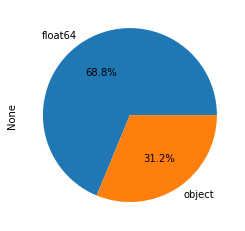

In [15]:
new_big_df.dtypes.value_counts(normalize=True).plot.pie(autopct="%1.1f%%")


### 3.1 - Analyse de la distribution des variables qualitatives  
 Dans cette section , nous allons analyser la distribution des variables qualitatives suivantes:  
 - product_name, final_categories,   
 - Les variables catégorielles: nutriscore_grade, nova_group,ecoscore_grade_fr	

##### a. La variable 'product_name'

Text(0.5, 1.0, 'Classement des 15 produits les plus fréquents')

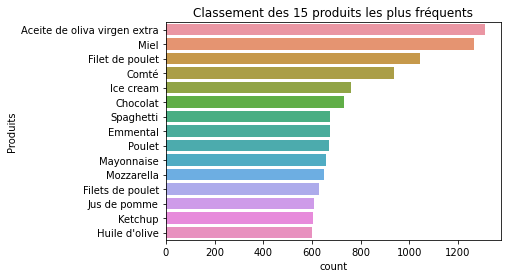

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(y="product_name", data=new_big_df, order=pd.value_counts(new_big_df['product_name']).iloc[:15].index)
plt.ylabel("Produits")
plt.title("Classement des 15 produits les plus fréquents")

##### b.  La variable 'final_categories'

Text(0.5, 1.0, 'Classement des 15 categories les plus fréquents')

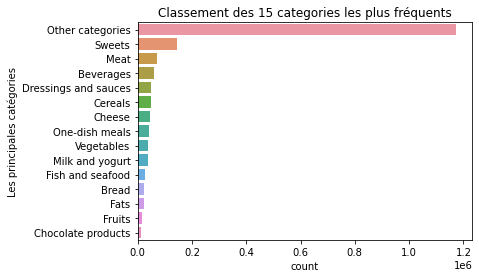

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(y='final_categories', data=new_big_df, order=pd.value_counts(new_big_df['final_categories']).iloc[:15].index)
plt.ylabel("Les principales catégories")
plt.title("Classement des 15 categories les plus fréquents")

#### Remarque:  
Nous remarquons que la classe des catégories la plus fréquente dans notre dataset est "other categories" qui regroupe toute catégorie non mentionnée et qui était représentée au début par Nan. Afin que notre graphe de classement soit plus représentatif des catégories réellement mentionnées, nous proposons de remplacer "Other categories" par "np.NaN" et ensuite re-tracer le graphe.

In [18]:
#remplacer "Other categories" par "np.NaN"
new_big_df = new_big_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
new_big_df['final_categories'] = new_big_df['final_categories'].map(lambda x: np.nan if x=="Other categories"  else x)

Text(0.5, 1.0, 'Classement des 15 categories les plus fréquents')

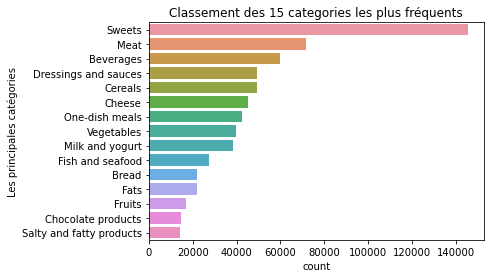

In [19]:
#retracer le classement des catégories
plt.figure(figsize=(6, 4))
sns.countplot(y='final_categories', data=new_big_df, order=pd.value_counts(new_big_df['final_categories']).iloc[:15].index)
plt.ylabel("Les principales catégories")
plt.title("Classement des 15 categories les plus fréquents")

### Conclusions:
   
 - Les produits les plus fréquents dans notre dataset sont "les plats à l'huile d'olive" et "le miel".  

 - La catégorie des produits la plus fréquente est "sweets". les produits alimentaires salés sont par contre les moins présents. 




#### C- Les variables catégorielles
 - Les variables catégorielles sont :'nutriscore_grade','ecoscore_grade_fr',nova_group.  
  
 - Nous avons remarqué, ci-dessus, que nova_group est de type float malgrès qu'elle représente le classement des aliments suivant leurs transformation (les produits les mieux classés sont ceux les plus naturels/sans transformation --> classe 1).  Nous devons donc convertir le type de cette colonne de "float" vers "category".



In [20]:
#convertir le type de la variable 'nova_group'de float --> category. 
new_big_df['nova_group'] = new_big_df['nova_group'].astype('category')

In [21]:
print ("le type de la variable 'nova_group' est désormais : ", new_big_df['nova_group'].dtypes)

le type de la variable 'nova_group' est désormais :  category


In [22]:
new_big_df.rename(columns = {'ecoscore_grade_fr':'ecoscore_grade'}, inplace = True)

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


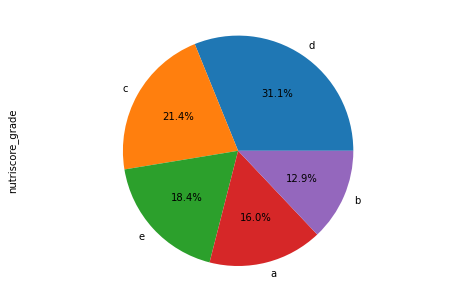

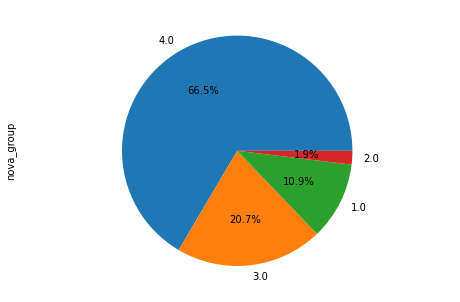

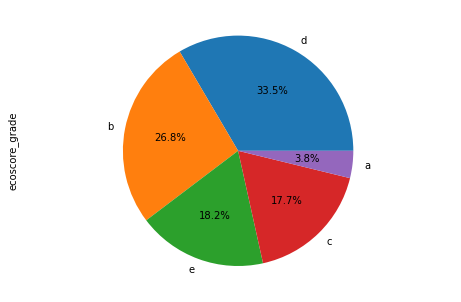

In [23]:
categ_var=['nutriscore_grade','nova_group','ecoscore_grade']
for col in categ_var:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis("equal")
    unique_vals=new_big_df[col].value_counts(normalize=True)
    unique_vals.plot.pie(autopct="%1.1f%%")

**- La distribution de la variable 'nutriscore_grade"**  
 
- D'après le heatmap-nans, on remarque que les lignes contenants des valeurs manquantes de nutriscrore_grade sont eux même contenant des valeurs manquantes de nutriscore_score. Reste à vérifier si le nutriscore-grade correspond vraiment au nutriscore-score.  Pareil pour ecoscrore_grade et ecoscore_score.  
- Je vais essayer de diviser la variable nutrisore_grade en sous-ensembles dépendamment de leurs catégories présentes. Ceci pour visualiser la distribution de différentes distributions et vérifier s'il y a des chevauchements et des outliers.  
- Nous allons formater les noms de classes de nutriscore_grade et ecoscore_grade du minuscule vers majuscule.  
- Nous allons définir une fonction "find_anomalies(data) qui permet de faire des statistiques concernant le data passé en paramètre et de retourner la liste des outlies ou anomalies si jamais il y existe. 


In [24]:
# définir une fonction qui permet de détecter les anomalies pour une variable
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    #print ('std = ',random_data_std)
    random_data_mean = np.mean(data)
    #print('mean = ', random_data_mean)
    anomaly_cut_off = random_data_std * 3
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    #print('lower_limit : ', lower_limit)
    #print('upper_limit : ', upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    #print ('\nLe nombre total des valeurs est : ',  data.count())
    #print ('Le pourcentage des valeurs aberrantes est : ', round((len(anomalies)/ data.count())*100,2), '%')
    #print ('Le nombre des valeurs outliers est : ',len(anomalies), '. Ils sont : ')
    return anomalies
    

In [25]:
#formater les libellés du nutriscore_grade : miniscule --> majuscule
new_big_df['nutriscore_grade'] = new_big_df['nutriscore_grade'].str.upper()
#Création de cinq sous-ensembles de nutriscore-grade
df_nutriscore_A= new_big_df[new_big_df['nutriscore_grade']=='A']
df_nutriscore_B= new_big_df[new_big_df['nutriscore_grade']=='B']
df_nutriscore_C= new_big_df[new_big_df['nutriscore_grade']=='C']
df_nutriscore_D= new_big_df[new_big_df['nutriscore_grade']=='D']
df_nutriscore_E= new_big_df[new_big_df['nutriscore_grade']=='E']

new_big_df['ecoscore_grade'] = new_big_df['ecoscore_grade'].str.upper()


C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

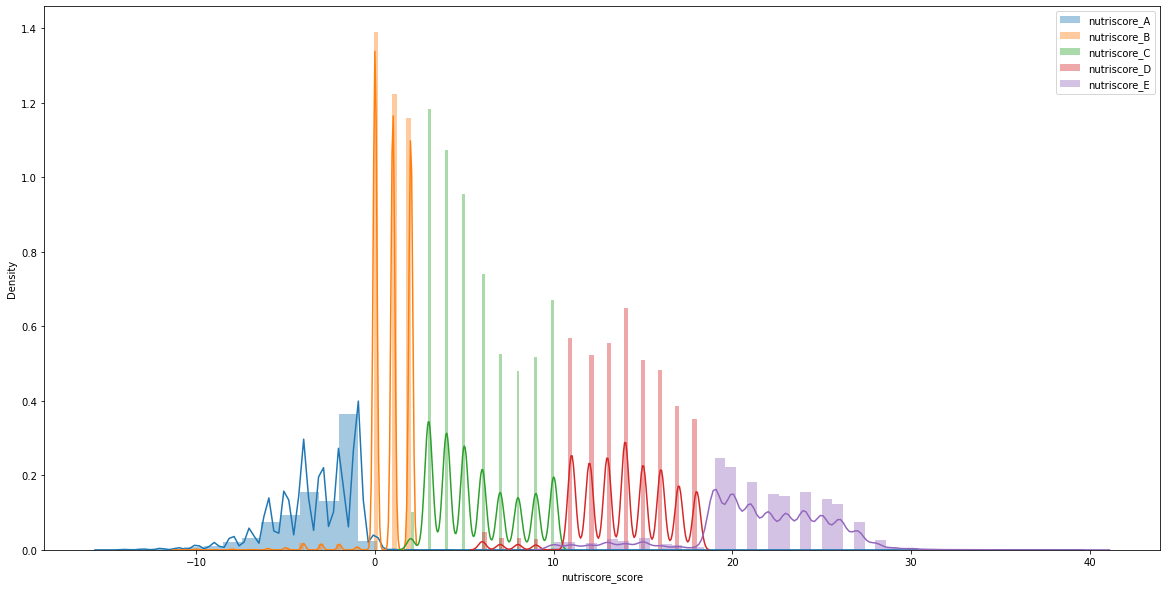

In [26]:
col='nutriscore_score'
plt.figure(figsize=(20,10))
sns.distplot(df_nutriscore_A[col], label='nutriscore_A')
sns.distplot(df_nutriscore_B[col], label='nutriscore_B')
sns.distplot(df_nutriscore_C[col], label='nutriscore_C')
sns.distplot(df_nutriscore_D[col], label='nutriscore_D')
sns.distplot(df_nutriscore_E[col], label='nutriscore_E')
plt.legend()

In [27]:
find_anomalies(df_nutriscore_A.nutriscore_score)

[-11.0,
 -11.0,
 -13.0,
 -12.0,
 -12.0,
 -14.0,
 -14.0,
 -13.0,
 -13.0,
 -12.0,
 -12.0,
 -14.0,
 -11.0,
 -13.0,
 -11.0,
 -12.0,
 -13.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -11.0,
 -12.0,
 -12.0,
 -12.0,
 -11.0,
 -11.0,
 -12.0,
 -11.0,
 -12.0,
 -12.0,
 -13.0,
 -12.0,
 -11.0,
 -14.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -14.0,
 -11.0,
 -12.0,
 -11.0,
 -13.0,
 -14.0,
 -14.0,
 -11.0,
 10.0,
 -14.0,
 -12.0,
 -12.0,
 -13.0,
 -13.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -12.0,
 -11.0,
 -14.0,
 -12.0,
 -13.0,
 -12.0,
 -11.0,
 -11.0,
 -13.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -11.0,
 -11.0,
 -12.0,
 -11.0,
 -13.0,
 -13.0,
 -12.0,
 -12.0,
 -13.0,
 -11.0,
 -13.0,
 -12.0,
 -12.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -12.0,
 -12.0,
 -12.0,
 -14.0,
 -12.0,
 -12.0,
 -12.0,
 -11.0,
 -11.0,
 -11.0,
 -14.0,
 -13.0,
 -13.0,
 -11.0,
 -13.0,
 -12.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -11.0,
 -13.0,
 -14.0,
 -14.0,
 -12.0,
 -11.0,
 -11.0,
 -11.0,
 -14.0,
 -13.0,
 -12.0,
 -12.0,
 -11.0,
 

In [28]:
find_anomalies(df_nutriscore_B.nutriscore_score)

[-8.0,
 -4.0,
 -6.0,
 -10.0,
 -6.0,
 -10.0,
 -3.0,
 -3.0,
 -3.0,
 -10.0,
 -10.0,
 -3.0,
 -3.0,
 -4.0,
 -4.0,
 -4.0,
 -10.0,
 -10.0,
 -10.0,
 -6.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -8.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -4.0,
 -3.0,
 -4.0,
 -4.0,
 -4.0,
 -5.0,
 -3.0,
 -8.0,
 -6.0,
 -4.0,
 -10.0,
 -10.0,
 -3.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -3.0,
 -4.0,
 -3.0,
 -7.0,
 -3.0,
 -10.0,
 -3.0,
 -4.0,
 -3.0,
 -3.0,
 -3.0,
 -10.0,
 -5.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -10.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -7.0,
 -3.0,
 -3.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -9.0,
 -10.0,
 -10.0,
 -10.0,
 -3.0,
 -8.0,
 -4.0,
 -5.0,
 -5.0,
 -5.0,
 -4.0,
 -4.0,
 -8.0,
 -3.0,
 -10.0,
 -10.0,
 -4.0,
 -3.0,
 -5.0,
 -3.0,
 -3.0,
 -10.0,
 -3.0,
 -3.0,
 -6.0,
 -10.0,
 -10.0,
 -3.0,
 -5.0,
 -3.0,
 -3.0,
 -3.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -5.0,
 -3.0,
 -3.0,
 -3.0,
 -10.0,
 -5.0,
 -10.0,
 -3.0,
 -3.0,
 -4.0,
 -5.0,
 -6.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -4.0,
 -7.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 

In [29]:
find_anomalies(df_nutriscore_C.nutriscore_score)

[]

In [30]:
find_anomalies(df_nutriscore_D.nutriscore_score)

[6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0

In [31]:
find_anomalies(df_nutriscore_E.nutriscore_score)

[36.0,
 34.0,
 34.0,
 34.0,
 34.0,
 40.0,
 40.0,
 34.0,
 34.0,
 35.0,
 34.0,
 40.0,
 34.0,
 35.0,
 37.0,
 36.0,
 36.0,
 34.0,
 36.0,
 35.0,
 35.0,
 35.0,
 35.0,
 35.0,
 35.0,
 35.0,
 34.0,
 35.0,
 34.0,
 36.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 35.0,
 34.0,
 36.0,
 34.0,
 35.0,
 34.0,
 34.0,
 34.0,
 35.0,
 40.0,
 36.0,
 36.0,
 34.0,
 40.0,
 36.0,
 36.0,
 34.0,
 34.0,
 34.0,
 37.0,
 37.0,
 34.0,
 35.0,
 34.0,
 36.0,
 37.0,
 34.0,
 35.0,
 36.0,
 35.0,
 35.0,
 36.0,
 35.0,
 36.0,
 37.0,
 36.0,
 37.0,
 37.0,
 34.0,
 35.0,
 34.0,
 35.0,
 35.0,
 36.0,
 36.0,
 36.0,
 34.0,
 35.0,
 35.0,
 34.0,
 40.0,
 34.0,
 34.0,
 37.0,
 40.0,
 37.0,
 40.0,
 38.0,
 36.0,
 35.0,
 36.0,
 35.0,
 36.0,
 34.0,
 35.0,
 34.0,
 34.0,
 35.0,
 37.0,
 34.0,
 35.0,
 34.0,
 34.0,
 34.0,
 35.0,
 34.0,
 35.0,
 34.0,
 35.0,
 34.0,
 35.0,
 36.0,
 34.0,
 34.0,
 36.0,
 34.0,
 36.0,
 36.0,
 35.0,
 35.0,
 36.0,
 36.0,
 34.0,
 34.0,
 39.0,
 36.0,
 38.0,
 36.0,
 34.0,
 34.0,
 36.0,
 35.0,
 34.0,
 34.0,
 36.0,
 35.0,
 36.0,

### Conclusion:    

**1-** Nous remarquons, d'après les courbes de distributions,  qu'il a y de faible chevauchements entre les différentes sous-distributions. Pour vérifier celà par des valeurs numériques, nous faisons appel à la fonction "find_anomalies".

**2-** Nous remarquons, d'après les résultats fournis par la fonction 'find_anomalies' que les pourcentages des outliers pour chaque sous_distribution sont négligeables. Je pense que ces outliers n'affectent pas la qualité de notre dataset. On peut les garder pour le moment. 
- 0.91 % pour nutriscore_A
- 1.29 % pour nutriscore_B  
- 0 %    pour nutriscore_C
- 1.18 % pour nutriscore_D
- 0.12 % pour nutriscore_E  


**- La distribution de la variable 'ecoscore_grade"**  

Je vais essayer de diviser la variable nutrisore_grade en sous-ensembles dépendamment de leurs catégories présentes. Ceci pour visualiser la distribution de différentes distributions et vérifier s'il y a des chevauchements et des outliers.

In [32]:
#formater les libellés d'ecoscore_grade : miniscule --> majuscule
new_big_df['ecoscore_grade'] = new_big_df['ecoscore_grade'].str.upper()

#Création de cinq sous-ensembles d'ecoscore-grade
df_ecoscore_A= new_big_df[new_big_df['ecoscore_grade']=='A']
df_ecoscore_B= new_big_df[new_big_df['ecoscore_grade']=='B']
df_ecoscore_C= new_big_df[new_big_df['ecoscore_grade']=='C']
df_ecoscore_D= new_big_df[new_big_df['ecoscore_grade']=='D']
df_ecoscore_E= new_big_df[new_big_df['ecoscore_grade']=='E']

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

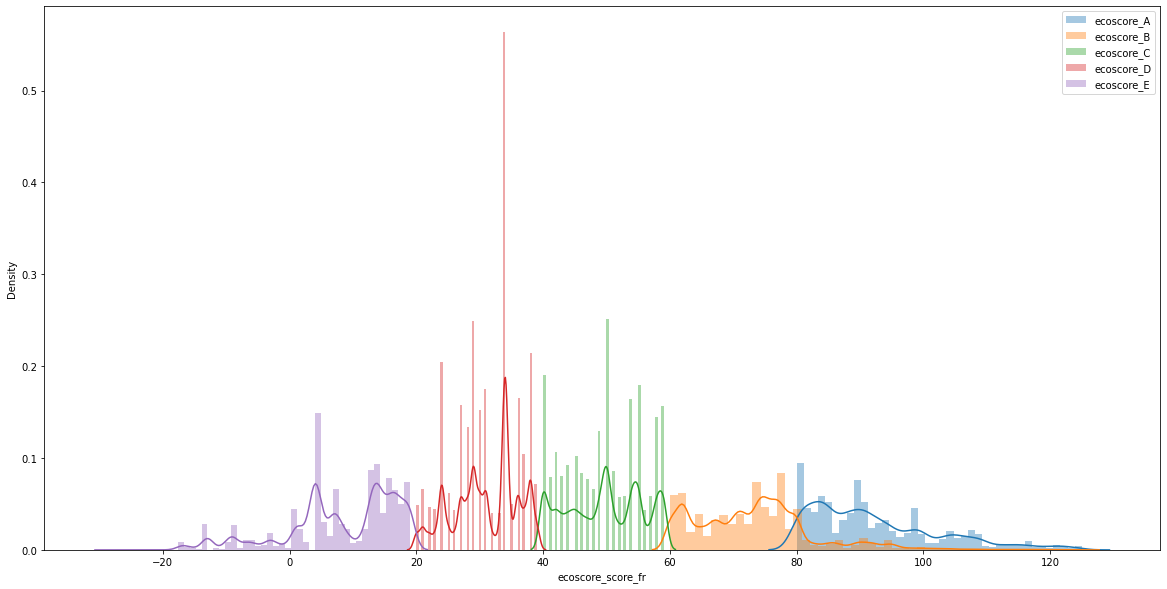

In [33]:
col='ecoscore_score_fr'
plt.figure(figsize=(20,10))
sns.distplot(df_ecoscore_A[col], label='ecoscore_A')
sns.distplot(df_ecoscore_B[col], label='ecoscore_B')
sns.distplot(df_ecoscore_C[col], label='ecoscore_C')
sns.distplot(df_ecoscore_D[col], label='ecoscore_D')
sns.distplot(df_ecoscore_E[col], label='ecoscore_E')
plt.legend()

In [34]:
find_anomalies(df_ecoscore_A.ecoscore_score_fr)

[124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 125.0,
 125.0,
 125.0,
 125.0,
 125.0,
 125.0,
 125.0,
 125.0,
 124.0,
 124.0,
 125.0,
 125.0,
 124.0,
 124.0,
 124.0,
 125.0,
 125.0,
 125.0,
 125.0,
 125.0,
 124.0,
 125.0,
 124.0,
 124.0,
 124.0,
 125.0,
 124.0,
 124.0,
 125.0,
 124.0,
 125.0,
 124.0,
 124.0,
 125.0,
 125.0,
 124.0,
 124.0,
 125.0,
 125.0,
 124.0,
 124.0,
 124.0,
 125.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 124.0,
 125.0,
 125.0]

In [35]:
find_anomalies(df_ecoscore_B.ecoscore_score_fr)

[103.0,
 103.0,
 102.0,
 104.0,
 102.0,
 102.0,
 102.0,
 103.0,
 114.0,
 104.0,
 103.0,
 103.0,
 114.0,
 103.0,
 103.0,
 102.0,
 103.0,
 104.0,
 107.0,
 104.0,
 103.0,
 107.0,
 102.0,
 107.0,
 116.0,
 116.0,
 104.0,
 102.0,
 109.0,
 114.0,
 104.0,
 102.0,
 107.0,
 102.0,
 102.0,
 105.0,
 121.0,
 103.0,
 119.0,
 103.0,
 108.0,
 108.0,
 102.0,
 125.0,
 113.0,
 110.0,
 108.0,
 108.0,
 108.0,
 117.0,
 111.0,
 102.0,
 105.0,
 105.0,
 105.0,
 112.0,
 106.0,
 105.0,
 102.0,
 106.0,
 107.0,
 111.0,
 107.0,
 102.0,
 102.0,
 102.0,
 102.0,
 104.0,
 102.0,
 107.0,
 118.0,
 111.0,
 117.0,
 107.0,
 103.0,
 106.0,
 103.0,
 103.0,
 114.0,
 104.0,
 107.0,
 104.0,
 107.0,
 102.0,
 102.0,
 108.0,
 104.0,
 107.0,
 104.0,
 103.0,
 117.0,
 121.0,
 103.0,
 108.0,
 108.0,
 107.0,
 107.0,
 104.0,
 116.0,
 109.0,
 103.0,
 104.0,
 104.0,
 104.0,
 104.0,
 104.0,
 104.0,
 103.0,
 110.0,
 104.0,
 114.0,
 103.0,
 115.0,
 105.0,
 105.0,
 105.0,
 104.0,
 120.0,
 105.0,
 105.0,
 105.0,
 104.0,
 104.0,
 103.0,
 105.0,


In [36]:
find_anomalies(df_ecoscore_C.ecoscore_score_fr)

[]

In [37]:
find_anomalies(df_ecoscore_D.ecoscore_score_fr)

[]

In [38]:
find_anomalies(df_ecoscore_E.ecoscore_score_fr)

[-19.0,
 -19.0,
 -19.0,
 -19.0,
 -19.0,
 -19.0,
 -18.0,
 -18.0,
 -28.0,
 -23.0,
 -18.0,
 -19.0,
 -18.0,
 -18.0,
 -19.0,
 -24.0,
 -18.0,
 -26.0,
 -19.0,
 -19.0,
 -18.0,
 -19.0,
 -19.0,
 -19.0,
 -19.0]

### Conclusion:    

**1-** Nous remarquons, d'après les courbes de distributions,  qu'il a y de faible chevauchements entre les différentes sous-distributions. Pour vérifier celà par des valeurs numériques, nous faisons appel à la fonction "find_anomalies".

**2-** Nous remarquons, d'après les résultats fournis par la fonction 'find_anomalies' que les pourcentages des outliers pour chaque sous_distribution sont négligeables. Je pense que ces outliers n'affectent pas la qualité de notre dataset. On peut les garder pour le moment. 
- 0.52 % pour ecoscore_A
- 1.36 % pour ecoscore_B  
- 0 %    pour ecoscore_C
- 0 % pour ecoscore_D
- 0.03 % pour ecoscore_E  

## 3.2 Analyse de la distribution des variables quantitatives

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


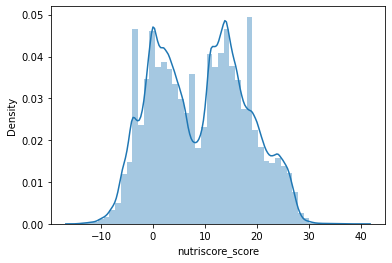

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


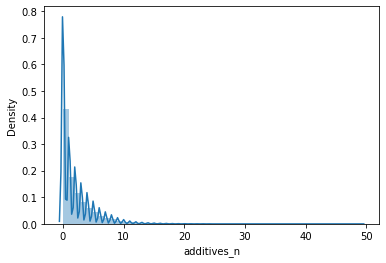

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


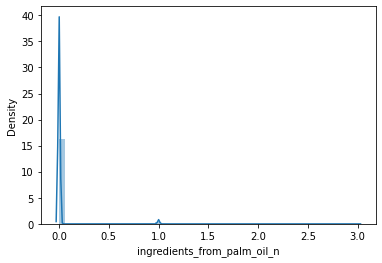

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


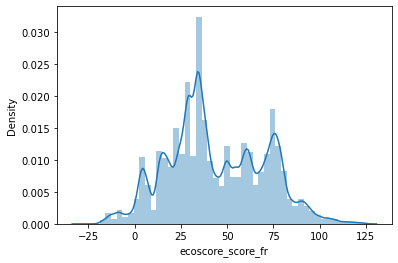

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


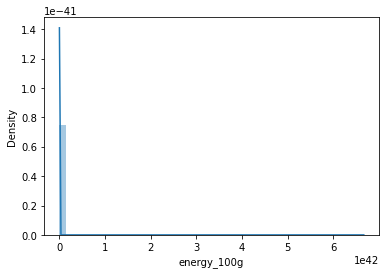

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


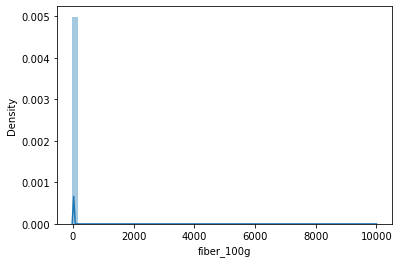

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


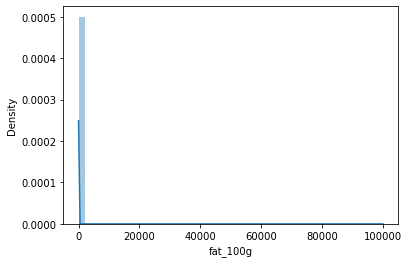

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


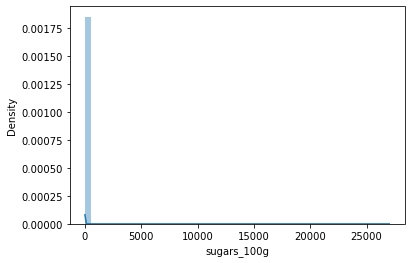

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


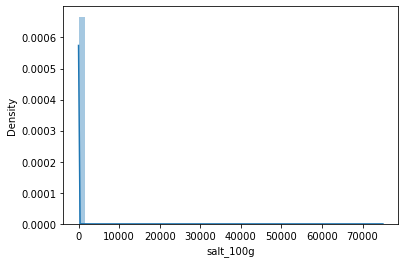

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


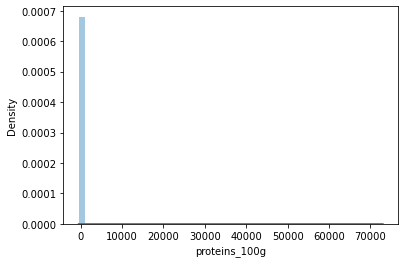

<Figure size 864x432 with 0 Axes>

In [39]:
# vérifier les distributions des variables quantitatives
for var in new_big_df.columns:
    if new_big_df[var].dtypes == 'float':
        sns.distplot(new_big_df[var], label=var)
        plt.figure(figsize=(12,6))
        plt.show()

#### Remarque:  
Nous constatons qu'une erreur a été produite lors de l'affichage des distributions "OverflowError: cannot convert float infinity to integer". Ceci est fort probablement dû à la présence des outliers qui sont vus comme des valeurs infinis. Pour confirmer cette hypothèse, nous visualisons les valeurs quantitatives sous forme de boxplots.  

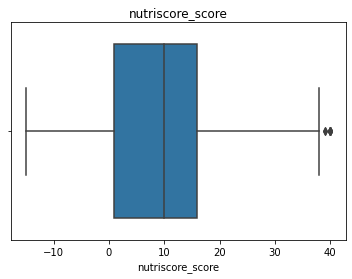

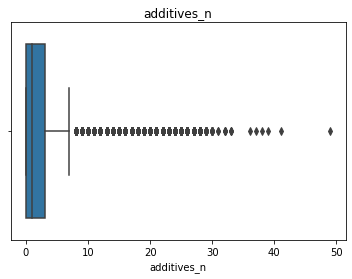

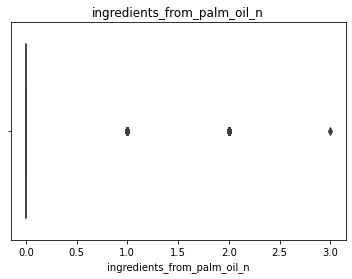

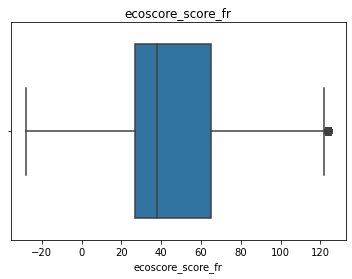

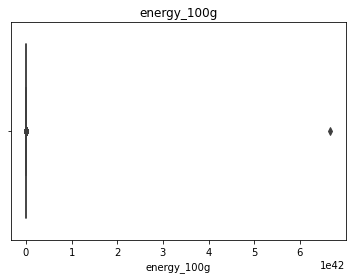

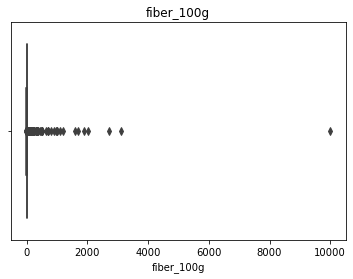

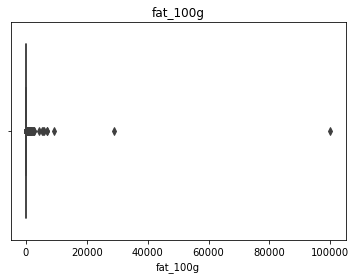

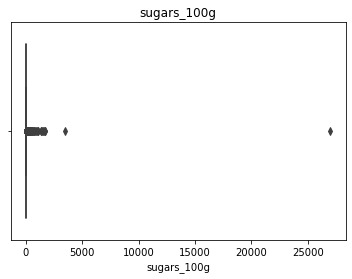

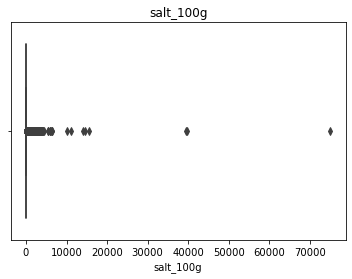

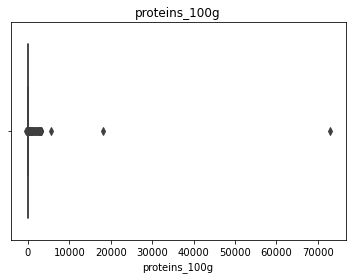

In [40]:
#renforcer la visualisation du comportement des variables quantitatives en utilisant les boxplots
for var in new_big_df.columns:
    if new_big_df[var].dtypes == 'float':
        sns.boxplot(x=var, data=new_big_df)
        plt.title(var)
        plt.show()

### Conclusions:  
- Notre hypothèse est confirmé. Nous devons donc supprimer les outliers , ensuite afficher les boxplots pour vérifier la distribution de chaque variable.

In [41]:
#creer un dataframe à nettoyer
cleaned_df=new_big_df

#### a- Nettoyer la variable "nutriscore_score"

57


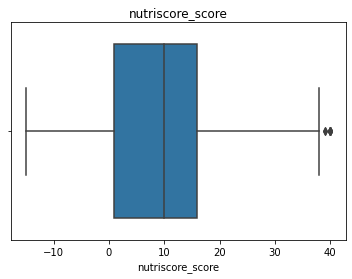

In [42]:
#supprimer les outliers
var=cleaned_df['nutriscore_score']
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['nutriscore_score'].isin(find_anomalies(var))]
    print(len(find_anomalies(var)))
sns.boxplot(x=var, data=cleaned_df)
plt.title('nutriscore_score')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


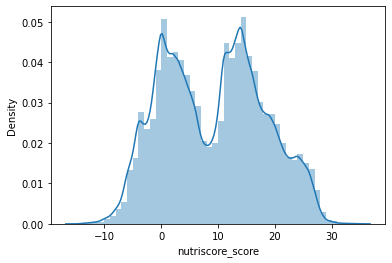

<Figure size 864x432 with 0 Axes>

In [43]:
#estimer la distribution
sns.distplot(cleaned_df['nutriscore_score'], label='nutriscore_score')
plt.figure(figsize=(12,6))
plt.show()

#### b- Nettoyer la variable "ecoscore_score_fr"

260


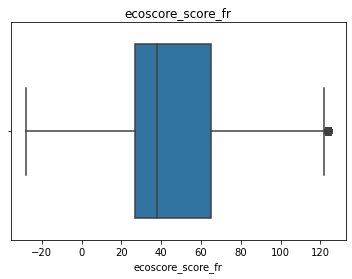

In [44]:
var=cleaned_df['ecoscore_score_fr']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['ecoscore_score_fr'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('ecoscore_score_fr')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


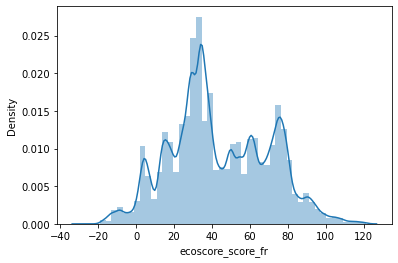

<Figure size 864x432 with 0 Axes>

In [45]:
sns.distplot(cleaned_df['ecoscore_score_fr'], label='ecoscore_score_fr')
plt.figure(figsize=(12,6))
plt.show()

#### c- Nettoyer la variable 'energy_100g'

1


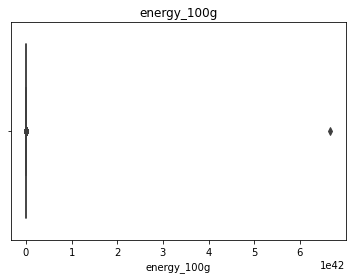

In [46]:
var=cleaned_df['energy_100g']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['energy_100g'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('energy_100g')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


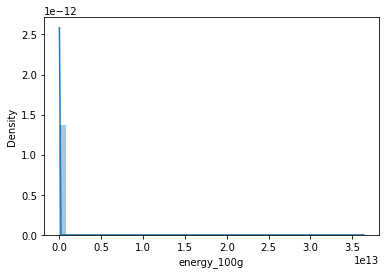

<Figure size 864x432 with 0 Axes>

In [47]:
sns.distplot(cleaned_df['energy_100g'], label='energy_100g')
plt.figure(figsize=(12,6))
plt.show()

  #### d- Nettoyer la variable 'fiber_100g'

474


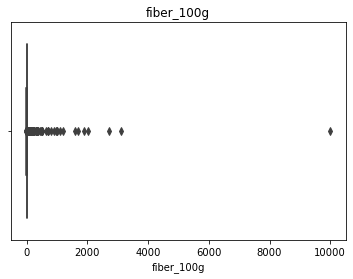

In [48]:
var=cleaned_df['fiber_100g']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['fiber_100g'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('fiber_100g')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


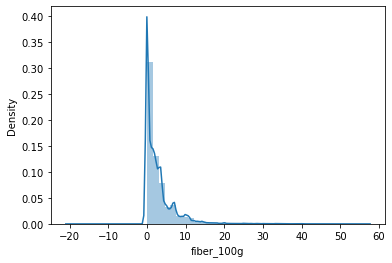

<Figure size 864x432 with 0 Axes>

In [49]:
sns.distplot(cleaned_df['fiber_100g'], label='fiber_100g')
plt.figure(figsize=(12,6))
plt.show()

#### e- Nettoyer la variable 'fat_100g'

62


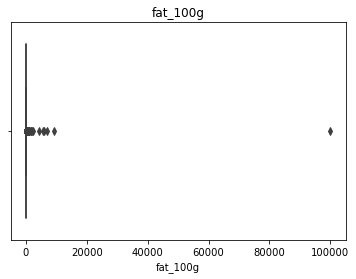

In [50]:
var=cleaned_df['fat_100g']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['fat_100g'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('fat_100g')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


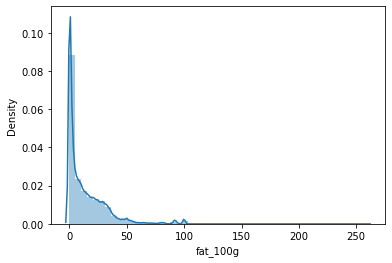

<Figure size 864x432 with 0 Axes>

In [51]:
sns.distplot(cleaned_df['fat_100g'], label='fat_100g')
plt.figure(figsize=(12,6))
plt.show()

#### f- Nettoyer la variable 'sugars_100g'

29302


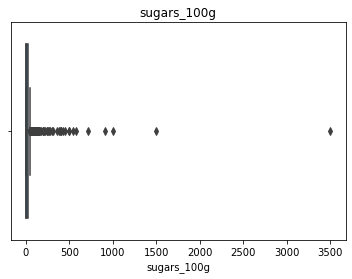

In [52]:
var=cleaned_df['sugars_100g']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['sugars_100g'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('sugars_100g')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


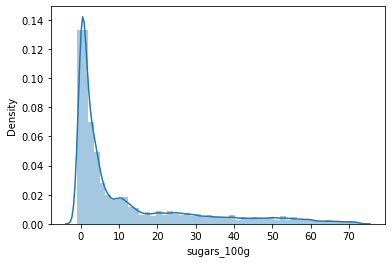

<Figure size 864x432 with 0 Axes>

In [53]:
sns.distplot(cleaned_df['sugars_100g'], label='sugars_100g')
plt.figure(figsize=(12,6))
plt.show()

#### g- Nettoyer la variable 'salt_100g'

603


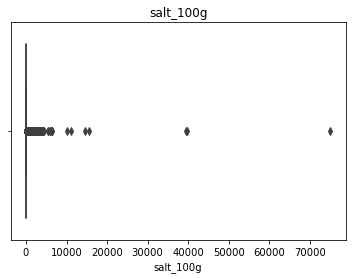

In [54]:
var=cleaned_df['salt_100g']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['salt_100g'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('salt_100g')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


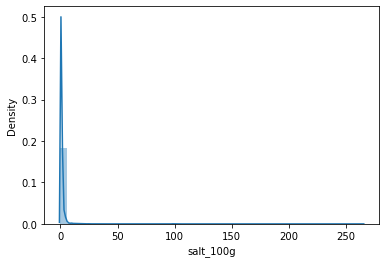

<Figure size 864x432 with 0 Axes>

In [55]:
sns.distplot(cleaned_df['salt_100g'], label='salt_100g')
plt.figure(figsize=(12,6))
plt.show()

11373


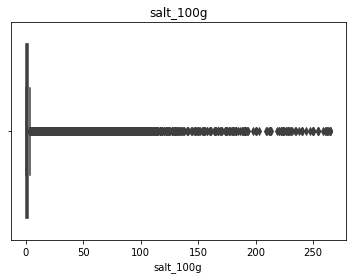

In [56]:
var=cleaned_df['salt_100g']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['salt_100g'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('salt_100g')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


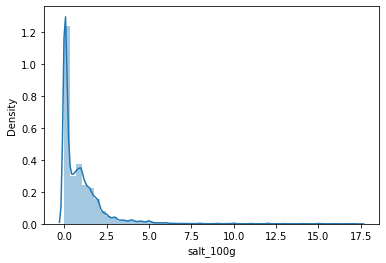

<Figure size 864x432 with 0 Axes>

In [57]:
sns.distplot(cleaned_df['salt_100g'], label='salt_100g')
plt.figure(figsize=(12,6))
plt.show()

#### f- Nettoyer la variable 'proteins_100g'

13977


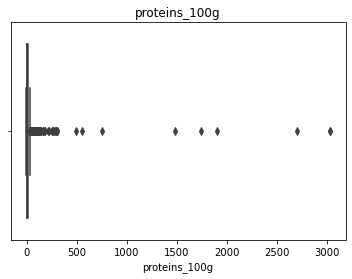

In [58]:
var=cleaned_df['proteins_100g']
print(len(find_anomalies(var)))
if(find_anomalies(var)):
    cleaned_df = cleaned_df[~cleaned_df['proteins_100g'].isin(find_anomalies(var))]
sns.boxplot(x=var, data=cleaned_df)
plt.title('proteins_100g')
plt.show()

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


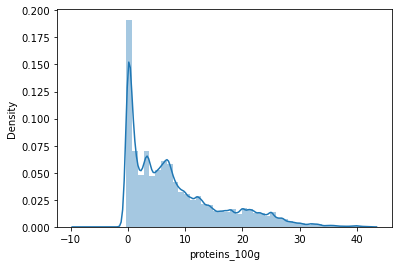

<Figure size 864x432 with 0 Axes>

In [59]:
sns.distplot(cleaned_df['proteins_100g'], label='proteins_100g')
plt.figure(figsize=(12,6))
plt.show()

In [60]:
cleaned_df.shape

(1851208, 16)

#### Conclusions:  
- Nous remarquons qu'à chaque boucle, les valeurs aberrantes sont supprimées et le boxplot de la variable quantitative en question devient de plus en plus claire.  Une fois c'est fait, nous afficherons le boxplot correspondant.  
- Nous remarquons que la distribution de différentes variable n'est pas normale. Ceci peut être dû à:  
  - un échantillon de très grande taille,  
  - présence de outliers ou sont constatés des mélanges de distributions  
  - Valeurs non normalisés --> distribution asymétrique  
- près voir supprimer quelques outliers, le nombre de ligne du dataset a diminué de :   1907317 --> 1843672  (63 645 lignes ont été supprimées)
- Nous avons exclu de cette procédure les variables :  
    - 'ingredients_from_palm_oil_n': parce que c'est normal qu'on trouve un seul produit ayant 3 ingérédients extrait d'huile de palme. Ce n'est pas une valeur aberrante mais plutôt atypique. Nous garderons cette valeur.
    - 'additives_n': je pense que c'est aussi possible d'avoir un produit contenant 30 ou 38 additifs, ce sont des valeurs atypiques plutôt que des anomalies. Nous allons les garder.  
    - Nous représentons ces variables ('ingredients_from_palm_oil_n'/'additives_n') par des countplots pour les visualiser. 

#### g- Visulisation des variables 'ingredients_from_palm_oil_n' et 'additives_n'

In [61]:
cleaned_df['ingredients_from_palm_oil_n'].value_counts()

0.0    667725
1.0     13769
2.0       190
3.0         1
Name: ingredients_from_palm_oil_n, dtype: int64

In [62]:
cleaned_df['additives_n'].value_counts()

0.0     287889
1.0     118384
2.0      76529
3.0      54355
4.0      40929
5.0      29355
6.0      20341
7.0      15048
8.0      11453
9.0       7784
10.0      5335
11.0      3744
12.0      2743
13.0      1982
14.0      1452
15.0      1071
16.0       805
17.0       621
18.0       437
19.0       323
20.0       261
21.0       187
23.0       157
22.0       148
24.0       105
26.0        65
25.0        59
28.0        42
27.0        38
29.0        18
30.0        10
32.0         4
33.0         3
31.0         2
39.0         1
41.0         1
37.0         1
49.0         1
36.0         1
38.0         1
Name: additives_n, dtype: int64

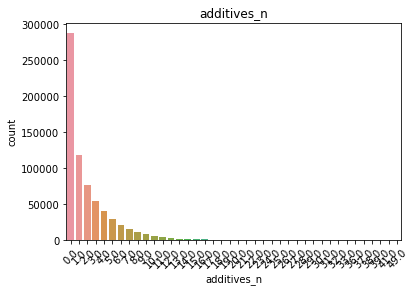

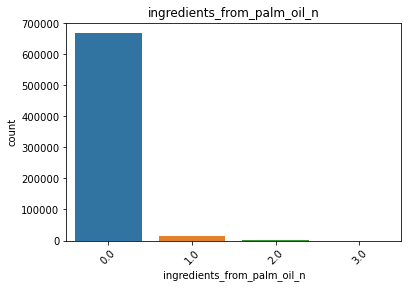

In [63]:
countplot_var_list=[ 'additives_n' , 'ingredients_from_palm_oil_n']
for var in countplot_var_list:
    sns.countplot(x=var, data=cleaned_df)
    plt.title(var)
    plt.xticks(rotation=45)
    plt.show()

#### Remarque:   

- La majorité des produits ne contiennet pas des ingrédients provenant de huile de palme. 

# 4. Analyse bivariée
### 4.1. Var quantitative/ quantitative

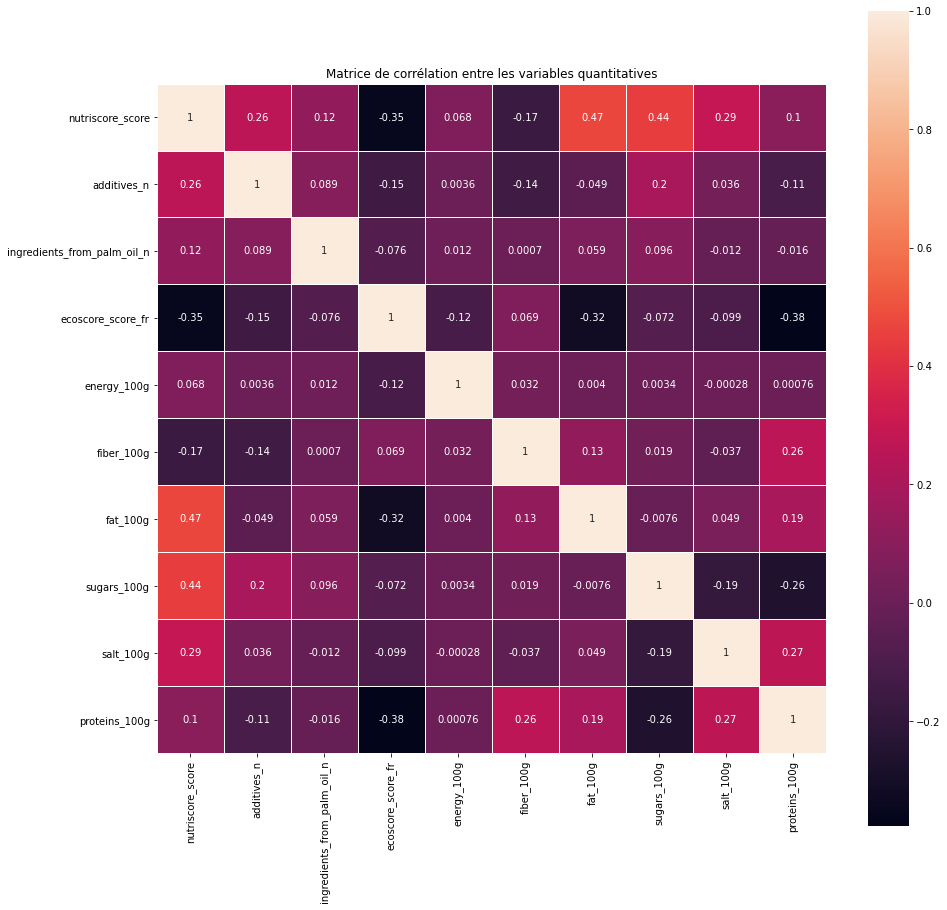

In [64]:
# corrélation entre tous les variables quantitatives
corr_df = cleaned_df.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True,square=True,linewidths=.5)
plt.title("Matrice de corrélation entre les variables quantitatives")
plt.show()

##### Remarques  
- Nous remarquons qu'il y a une corrélation assez forte entre **nutriscore_score** et **sugar_100g** (0.44), **fat_100g** (0.47) et **energy_100g** (0.56)
- Nous remarquons qu'il y a une forte corrélation entre **fat_100g** et **energy_100g** (0.77) 
- Nous remarquons qu'il y a une corrélation moyenne entre **fiber_100g** et **energy_100g**(0.36) 
- La corrélation entre **ecoscore_score** et les autres variables quantitatives est assez faible. Je pense pas qu'on peut prédire la valeur d'ecoscore à partir d'eux.   
- Reste à vérifier la corréltion entre ces différentes variables quantitaives et nova_group. Ceci afin de chercher s'il y a possibilité de prédive la  classe de nov_group à prtir d'eux. Nous supposons que prédire la classe dépendra sur nombre des additifs, qui représentra, en quelque sorte, combien de fois l'aliment est transformé. plus qu'il y a d'additif, plus que le produit soit proche de classe 4 et loin de classe 1 --> hypothèse à vérifier dns la section suivante. 

In [66]:
util.variable_survey(cleaned_df)
sns.pairplot(cleaned_df) 

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,product_name,object,1156734,4.28 %
1,countries,object,10381,0.3 %
2,final_categories,object,26,61.33 %
3,nutriscore_score,float64,51,63.07 %
4,nutriscore_grade,object,5,63.07 %
5,nova_group,category,4,67.81 %
6,additives_n,float64,40,63.18 %
7,ingredients_from_palm_oil_n,float64,4,63.18 %
8,ecoscore_score_fr,float64,145,75.7 %
9,ecoscore_grade,object,5,75.7 %


In [67]:
for column in cleaned_df:
    if cleaned_df[column].dtype == 'float64':
        cleaned_df[column]=pd.to_numeric(cleaned_df[column], downcast='float')

In [68]:
util.variable_survey(cleaned_df)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,product_name,object,1156734,4.28 %
1,countries,object,10381,0.3 %
2,final_categories,object,26,61.33 %
3,nutriscore_score,float32,51,63.07 %
4,nutriscore_grade,object,5,63.07 %
5,nova_group,category,4,67.81 %
6,additives_n,float32,40,63.18 %
7,ingredients_from_palm_oil_n,float32,4,63.18 %
8,ecoscore_score_fr,float32,145,75.7 %
9,ecoscore_grade,object,5,75.7 %


In [70]:
cleaned_df.shape

(1851208, 16)

MemoryError: Unable to allocate 11.9 TiB for an array with shape (1637420936557,) and data type float64

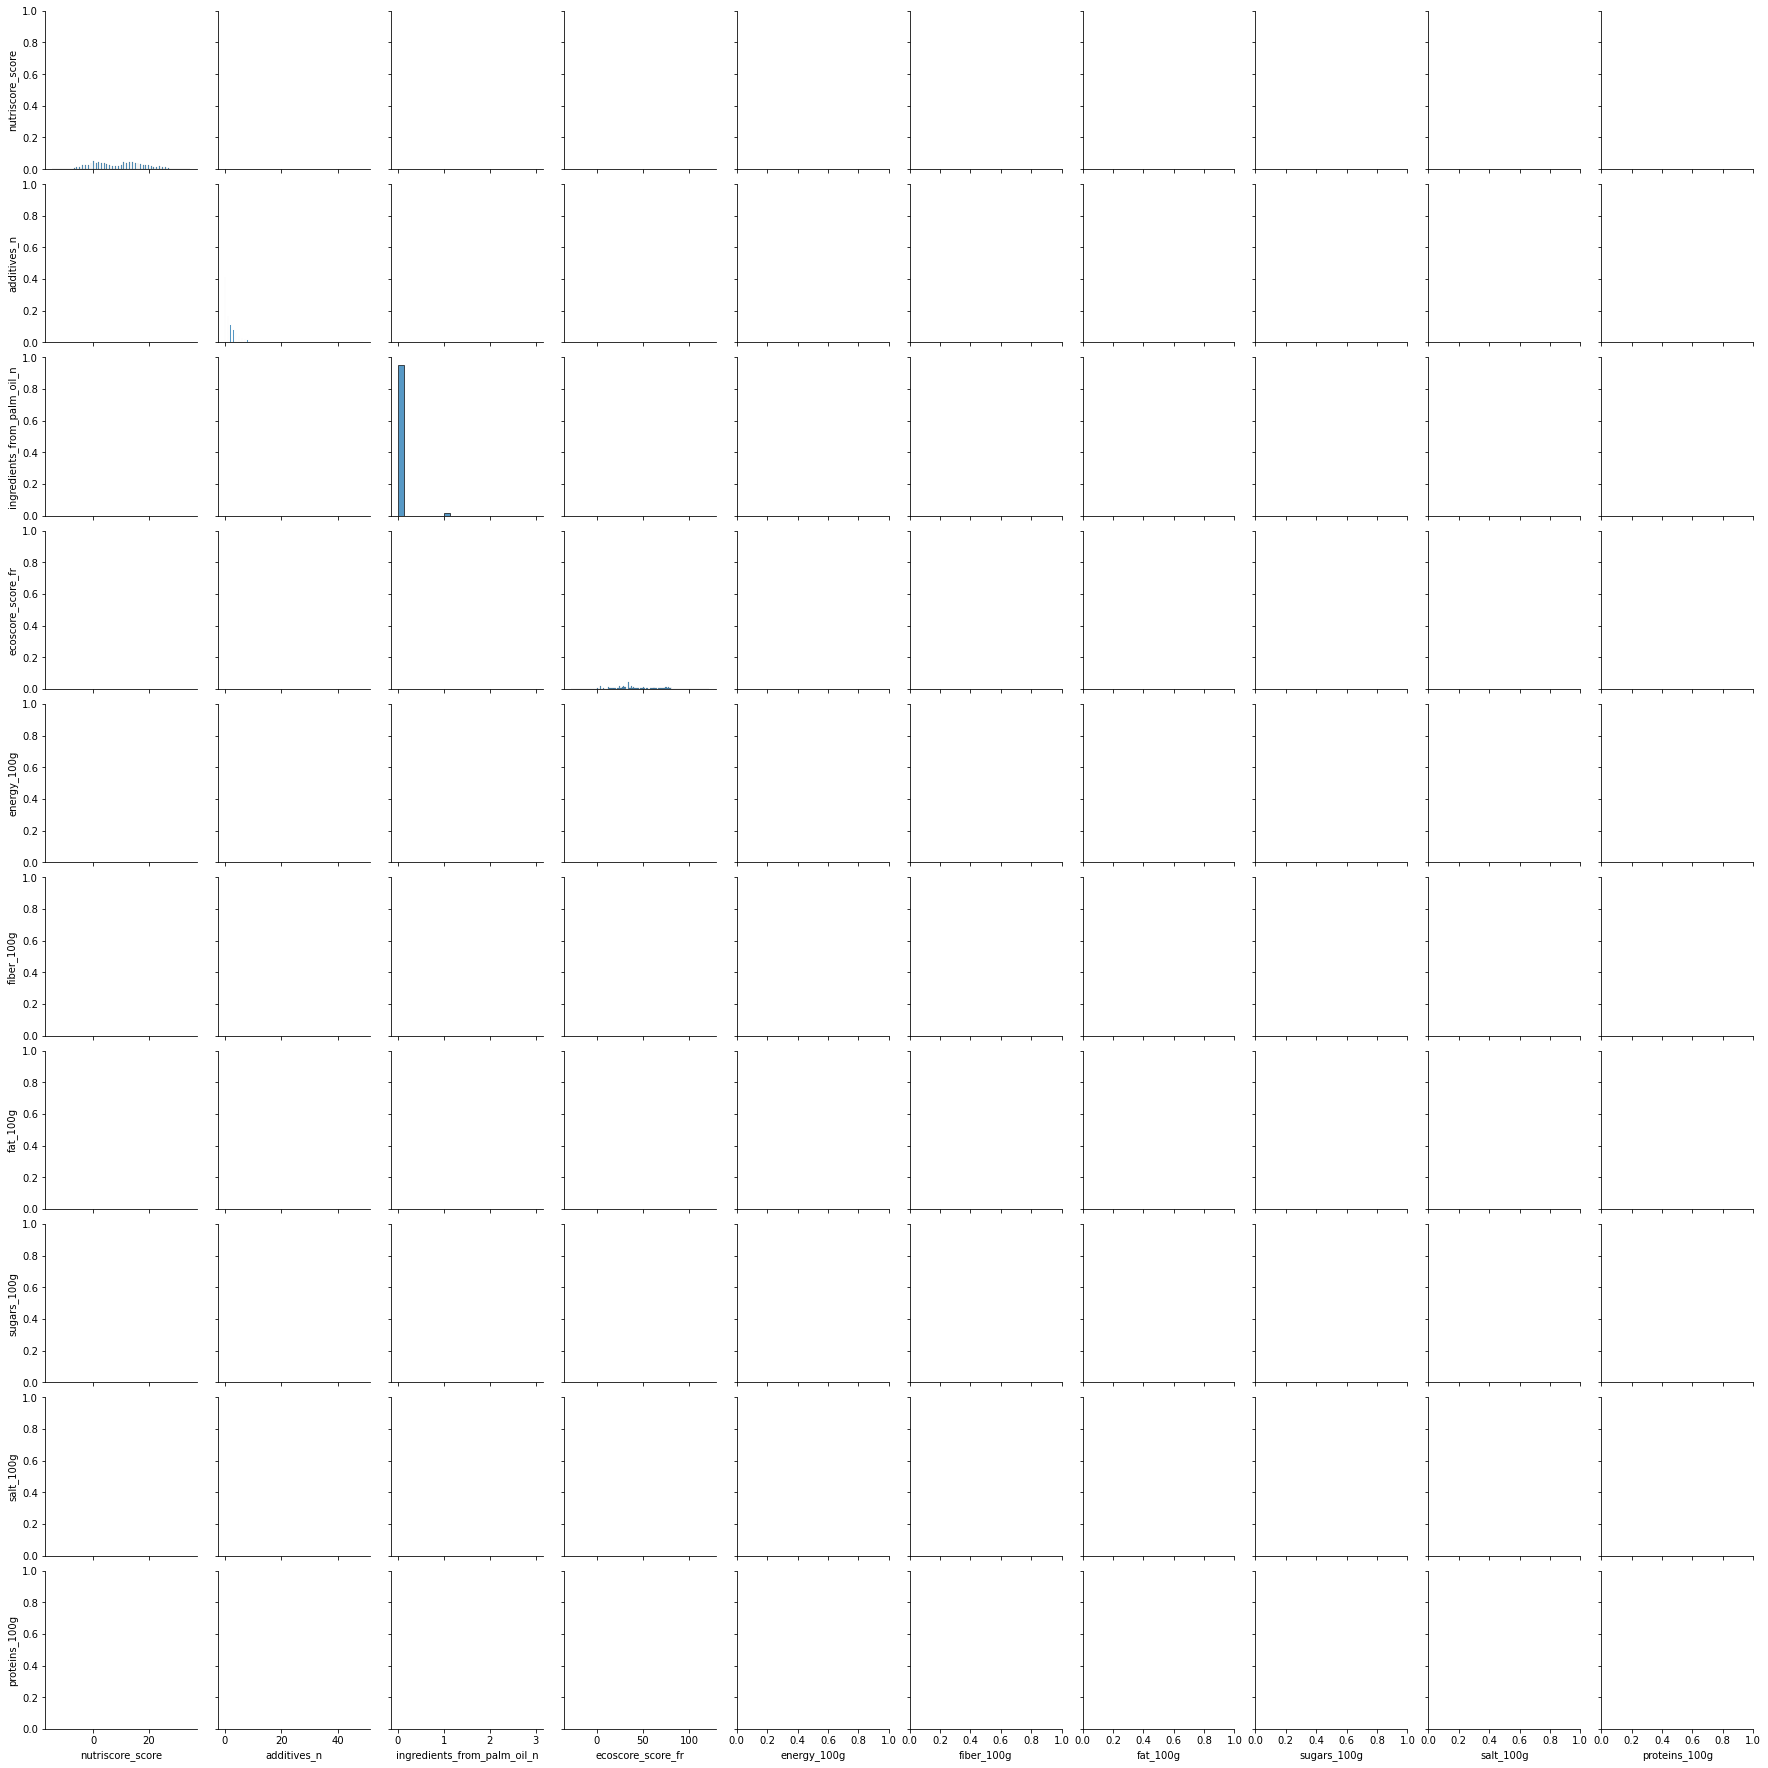

In [69]:
#sns.pairplot(cleaned_df)

## 4.2. Variable quantitative/qualitative  
Dans cette section, nous essayons de chercher s'il y a des relations entre les variables qualitatives qu'on essaye de prédire , et les autres variable quantitaives.

In [ ]:
sns.pairplot(cleaned_df, hue='nova_group') 

In [ ]:

sns.pairplot(cleaned_df, hue='nutriscore_grade') 

In [ ]:
sns.pairplot(cleaned_df, hue='ecoscore_grade') 